In [1]:
import numpy as pd

In [2]:
import pandas as pd

# How is a person’s self-reported level of anxiety and depression affected by the tempo of the music they listen to?

In [3]:
pd.read_csv("./../data/raw/mxmh_survey_results.csv")

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


I really have three variables present in my research question: 1. Anxiety, 2. Depression, and 3. Tempo. I will likely have to remove many of the columns as they will not be relevant. Also, while I did not see many null data points, there were still a few and I need to remove those. As far as visualizations go, I am not very familiar with the capabilities of the software we will be using so I am not sure what I will have to work with.

- first data is exploratory, axniety levels affect by music -- yes or not
- second layer, if yes than how does it affect, by spneidng more time, or other

<div align = 'center'><b> Potentially different questions? - Feedback said the original question was too vague </b></div>

- How are the frequency of listening to music genres, as well as ages of respondents, concentrated across different streaming services?
    - streaming services
    - Frequency of genre
    - Primary genre
    - Age
    
    Data could also be incorporated for more complex genres, bpm can be compared to genre to determine the style of music, for example trip hop, hardcore rap, etc.

- What kind of person listens to pop music?
    - Genre
    - frequency
    - composer
    - instrumentalist
    - age 
    - streaming service
    - foreign language
    - anxiety
    - ocd
    - insomnia

- Which genres of music are listened to during work?
- How is bpm distributed accross genres, or which kind of music listeners listen to high bpm music?
- How do genres of music use bpm?
- Mental health differences across genres/bpm
- How does participants age affect genre or streaming service selection?

In [4]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns#Understanding my variables

df = pd.read_csv("./../data/raw/mxmh_survey_results.csv")

df.shape
df.head()
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [5]:
df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,629.000000,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1589948.344992,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,39872606.180372,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,100.000000,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,120.000000,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,144.000000,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,999999999.000000,10.000000,10.000000,10.000000,10.000000


In [6]:
df_cleaned = df[["Fav genre", "Age"]]


In [7]:
df_cleaned

,Fav genre,Age
0,Latin,18.0
1,Rock,63.0
2,Video game music,18.0
3,Jazz,61.0
4,R&B,18.0
...,...,...
731,Rock,17.0
732,Pop,18.0
733,Rap,19.0
734,Classical,19.0


In [8]:
df_cleaned.dropna()

,Fav genre,Age
0,Latin,18.0
1,Rock,63.0
2,Video game music,18.0
3,Jazz,61.0
4,R&B,18.0
...,...,...
731,Rock,17.0
732,Pop,18.0
733,Rap,19.0
734,Classical,19.0


In [9]:
df_cleaned = df_cleaned.dropna(axis=0)


NameError: name 'fig' is not defined

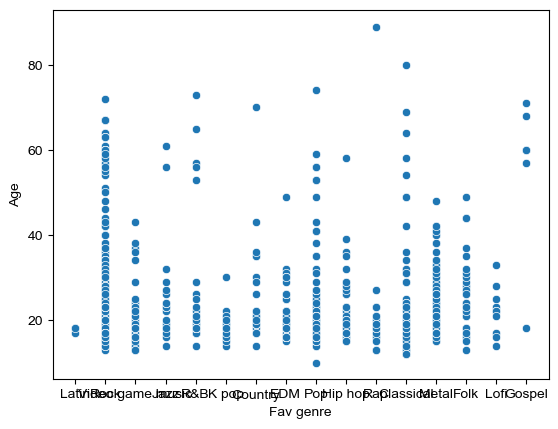

In [10]:
sns.scatterplot( x = "Fav genre", 
                 y = "Age", 
                 data = df_cleaned,)
sns.set(font_scale=2)


fig.set_size_inches(30, 6)


plt.show()

In [ ]:
sns.set(font_scale=.5)
sns.histplot(y = "Age", x = "Fav genre", data = df_cleaned)


In [ ]:
sns.barplot(x = "Fav genre", y = "Age", data = df_cleaned)

### Notes
- We can see that Gospel slants older
    - Not super surprising, I do not know any young people that listen to Gospel
- The most variety of listeners in age comes from Rock music
    - Makes sense as there are a lot of sub genres in Rock that span many decades (pop rock, punk, grunge, hair rock, etc.)
- High concentration of young listeners of pop music
- As well, while rock has older listeners than many other genres, there's a large concentration of young listeners
- Jazz, surprisingly, skews young
- K pop and Lo Fi, naturally, skew young
- Latin listeners are likely outliers
- R&B has a big young audience with some older listeners, likely from the 70s i.e. soul

# What kind of person listens to Pop music?
- I think the question: What kind of person listens to Pop music could be expanded upon with further research. Currently I do not have a great idea as to who listens to Pop as it is a pretty broad genre, but it would be interesting to explore what streaming service is used, this may indicate further explanations such as why Spotify spends more money on adding to their playlists, while Apple Music focuses on radio station, maybe this is because Spotify has more niche listeners while many mainstream, Pop listeners use Apple Music.
- This question could also be modified to fit other/more genres if necessary.
- To answer other questions that I proposed earlier I would need more data.

*****************************************************************************************************************************************

# <center> Milestone 4


In [11]:
import pandas as pd
import numpy as np

file_path = r"C:\Users\Burkely Theriault\DATA301\project-group29\data\raw\mxmh_survey_results.csv"
data = pd.read_csv(file_path)


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [13]:



data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [14]:
data = data.drop(['8/27/2022 19:29:02'], axis=1)

KeyError: "['8/27/2022 19:29:02'] not found in axis"

In [ ]:
data = data.dropna()

In [ ]:
print(data.columns)

In [ ]:
data = pd.read_csv(file_path, header=0)
print(data.columns)

In [ ]:
data.head()

In [ ]:
data = data.drop(['Timestamp'], axis=1)

In [ ]:
data.head()

In [ ]:
data.head()

In [ ]:
favgenre_col = data.pop('Fav genre')
data.insert(0, 'Fav genre', favgenre_col)
data.head()

In [ ]:
data = data[[col for col in data.columns if "Frequency" not in col]]
data.head()

In [ ]:
data.head()



In [ ]:
print(data.head())

In [15]:
data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [16]:
data = data.drop('Music effects', axis=1)
data = data.drop('Permissions', axis=1)


In [17]:
data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0


In [18]:
data3 = data[data['Fav genre'].str.lower() == 'pop']
data3.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
15,8/27/2022 23:19:52,17.0,Spotify,2.0,No,No,No,Pop,Yes,Yes,...,Rarely,Very frequently,Rarely,Sometimes,Sometimes,Rarely,7.0,5.0,4.0,1.0
23,8/28/2022 3:19:08,18.0,Spotify,2.0,Yes,No,No,Pop,No,Yes,...,Never,Very frequently,Never,Never,Never,Rarely,3.0,3.0,8.0,6.0
25,8/28/2022 4:38:14,18.0,Spotify,2.0,No,No,No,Pop,Yes,Yes,...,Never,Very frequently,Sometimes,Sometimes,Sometimes,Never,7.0,4.0,2.0,5.0
27,8/28/2022 5:05:51,18.0,YouTube Music,6.0,Yes,Yes,Yes,Pop,No,Yes,...,Never,Very frequently,Sometimes,Sometimes,Never,Never,3.0,2.0,1.0,2.0
28,8/28/2022 5:16:30,17.0,Spotify,2.0,Yes,Yes,No,Pop,Yes,Yes,...,Rarely,Very frequently,Rarely,Never,Sometimes,Sometimes,6.0,6.0,4.0,5.0


In [19]:
print(data3)


               Timestamp   Age          Primary streaming service  \
15    8/27/2022 23:19:52  17.0                            Spotify   
23     8/28/2022 3:19:08  18.0                            Spotify   
25     8/28/2022 4:38:14  18.0                            Spotify   
27     8/28/2022 5:05:51  18.0                      YouTube Music   
28     8/28/2022 5:16:30  17.0                            Spotify   
..                   ...   ...                                ...   
722  10/14/2022 18:01:12  19.0                            Spotify   
723  10/14/2022 20:42:26  16.0                            Spotify   
724  10/15/2022 14:00:55  19.0                            Spotify   
729  10/30/2022 13:13:32  21.0  I do not use a streaming service.   
732   11/1/2022 22:26:42  18.0                            Spotify   

     Hours per day While working Instrumentalist Composer Fav genre  \
15             2.0            No              No       No       Pop   
23             2.0           

In [20]:
data3.replace({"Yes": 1, "No": 2}, inplace=True)
print(data3)


               Timestamp   Age          Primary streaming service  \
15    8/27/2022 23:19:52  17.0                            Spotify   
23     8/28/2022 3:19:08  18.0                            Spotify   
25     8/28/2022 4:38:14  18.0                            Spotify   
27     8/28/2022 5:05:51  18.0                      YouTube Music   
28     8/28/2022 5:16:30  17.0                            Spotify   
..                   ...   ...                                ...   
722  10/14/2022 18:01:12  19.0                            Spotify   
723  10/14/2022 20:42:26  16.0                            Spotify   
724  10/15/2022 14:00:55  19.0                            Spotify   
729  10/30/2022 13:13:32  21.0  I do not use a streaming service.   
732   11/1/2022 22:26:42  18.0                            Spotify   

     Hours per day  While working  Instrumentalist  Composer Fav genre  \
15             2.0              2                2         2       Pop   
23             2.0     

C:\Users\Burkely Theriault\AppData\Local\Temp\ipykernel_8960\191453855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.replace({"Yes": 1, "No": 2}, inplace=True)


### to make yes =1, no =2

In [21]:
data3['Primary streaming service'] = data3['Primary streaming service'].replace({'YouTube Music': 1, 'Apple Music': 2, 'I do not use a streaming service.': 4, 'Spotify': 3})


C:\Users\Burkely Theriault\AppData\Local\Temp\ipykernel_8960\3815778081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['Primary streaming service'] = data3['Primary streaming service'].replace({'YouTube Music': 1, 'Apple Music': 2, 'I do not use a streaming service.': 4, 'Spotify': 3})


### to make youtube =1, apple =2, spotify =3, i do not use streaming services =4

In [22]:
print(data3.head())


             Timestamp   Age Primary streaming service  Hours per day  \
15  8/27/2022 23:19:52  17.0                         3            2.0   
23   8/28/2022 3:19:08  18.0                         3            2.0   
25   8/28/2022 4:38:14  18.0                         3            2.0   
27   8/28/2022 5:05:51  18.0                         1            6.0   
28   8/28/2022 5:16:30  17.0                         3            2.0   

    While working  Instrumentalist  Composer Fav genre  Exploratory  \
15              2                2         2       Pop            1   
23              1                2         2       Pop            2   
25              2                2         2       Pop            1   
27              1                1         1       Pop            2   
28              1                1         2       Pop            1   

    Foreign languages  ...  Frequency [Metal]  Frequency [Pop]  \
15                  1  ...             Rarely  Very frequently   
23

In [23]:
data3.dropna()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
23,8/28/2022 3:19:08,18.0,3,2.0,1,2,2,Pop,2,1,...,Never,Very frequently,Never,Never,Never,Rarely,3.0,3.0,8.0,6.0
25,8/28/2022 4:38:14,18.0,3,2.0,2,2,2,Pop,1,1,...,Never,Very frequently,Sometimes,Sometimes,Sometimes,Never,7.0,4.0,2.0,5.0
27,8/28/2022 5:05:51,18.0,1,6.0,1,1,1,Pop,2,1,...,Never,Very frequently,Sometimes,Sometimes,Never,Never,3.0,2.0,1.0,2.0
28,8/28/2022 5:16:30,17.0,3,2.0,1,1,2,Pop,1,1,...,Rarely,Very frequently,Rarely,Never,Sometimes,Sometimes,6.0,6.0,4.0,5.0
29,8/28/2022 8:36:27,17.0,2,1.0,1,2,2,Pop,1,2,...,Sometimes,Sometimes,Never,Never,Sometimes,Never,8.0,2.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,10/14/2022 18:01:12,19.0,3,4.0,1,2,2,Pop,1,1,...,Sometimes,Very frequently,Sometimes,Sometimes,Sometimes,Sometimes,8.0,6.0,2.0,0.0
723,10/14/2022 20:42:26,16.0,3,6.0,1,2,2,Pop,1,1,...,Never,Very frequently,Very frequently,Very frequently,Never,Never,10.0,7.0,6.0,10.0
724,10/15/2022 14:00:55,19.0,3,6.0,1,2,2,Pop,1,1,...,Never,Very frequently,Rarely,Rarely,Rarely,Sometimes,6.0,6.0,8.0,0.0
729,10/30/2022 13:13:32,21.0,4,0.5,2,2,2,Pop,1,2,...,Never,Very frequently,Sometimes,Sometimes,Very frequently,Never,6.0,2.0,2.0,0.0


# Task 2 - Method Chaining

In [24]:
import pandas as pd
import numpy as np

file_path2 = r"C:\Users\Burkely Theriault\DATA301\project-group29\data\raw\mxmh_survey_results.csv"  

df_methodchaining = (
    pd.read_csv(file_path2, header=0)
    .dropna()
    .drop(['Timestamp'], axis=1)
    .drop(['Music effects', 'Permissions'], axis=1)
    .pipe(lambda x: x.assign(Fav_genre=x.pop('Fav genre')))
    .pipe(lambda x: x[[col for col in x.columns if "Frequency" not in col]])
    .loc[lambda x: x['Fav genre'].str.lower() == 'pop']
    .replace({"Yes": 1, "No": 2})
    .assign(Primary_streaming_service=lambda x: x['Primary streaming service'].replace({'YouTube Music': 1, 'Apple Music': 2, 'I do not use a streaming service.': 4, 'Spotify': 3}))
    .dropna()
)


KeyError: 'Fav genre'

In [ ]:
data_methodchaining = pd.read_csv(file_path2, header=0)
print(data_methodchaining.columns)

In [25]:
file_path2 = r"C:\Users\Burkely Theriault\DATA301\project-group29\data\raw\mxmh_survey_results.csv"

df_methodchaining = (
    pd.read_csv(file_path2, header=0)
    .dropna()
    .drop(['Timestamp'], axis=1)
    .drop(['Music effects', 'Permissions'], axis=1)
    .pipe(lambda x: x.assign(Fav_genre=x.pop('Fav genre')))
    .pipe(lambda x: x[[col for col in x.columns if "Frequency" not in col]])
)

print(df_methodchaining.columns)

Index(['Age', 'Primary streaming service', 'Hours per day', 'While working',
       'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages',
       'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Fav_genre'],
      dtype='object')


In [26]:
df_methodchaining = (
    df_methodchaining
    .loc[lambda x: x['Fav_genre'].str.lower() == 'pop']
    .replace({"Yes": 1, "No": 2})
    .assign(Primary_streaming_service=lambda x: x['Primary streaming service'].replace({'YouTube Music': 1, 'Apple Music': 2, 'I do not use a streaming service.': 4, 'Spotify': 3}))
    .dropna()
)

In [27]:
print(df_methodchaining.head)

<bound method NDFrame.head of       Age          Primary streaming service  Hours per day  While working  \
23   18.0                            Spotify            2.0              1   
25   18.0                            Spotify            2.0              2   
27   18.0                      YouTube Music            6.0              1   
28   17.0                            Spotify            2.0              1   
29   17.0                        Apple Music            1.0              1   
..    ...                                ...            ...            ...   
722  19.0                            Spotify            4.0              1   
723  16.0                            Spotify            6.0              1   
724  19.0                            Spotify            6.0              1   
729  21.0  I do not use a streaming service.            0.5              2   
732  18.0                            Spotify            1.0              1   

     Instrumentalist  Composer  E

In [28]:
df_methodchaining.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,BPM,Anxiety,Depression,Insomnia,OCD,Fav_genre,Primary_streaming_service
23,18.0,Spotify,2.0,1,2,2,2,1,79.0,3.0,3.0,8.0,6.0,Pop,3
25,18.0,Spotify,2.0,2,2,2,1,1,169.0,7.0,4.0,2.0,5.0,Pop,3
27,18.0,YouTube Music,6.0,1,1,1,2,1,101.0,3.0,2.0,1.0,2.0,Pop,1
28,17.0,Spotify,2.0,1,1,2,1,1,126.0,6.0,6.0,4.0,5.0,Pop,3
29,17.0,Apple Music,1.0,1,2,2,1,2,183.0,8.0,2.0,1.0,5.0,Pop,2


In [29]:
df_methodchaining = (
    df_methodchaining
    .loc[lambda x: x['Fav_genre'].str.lower() == 'pop']
    .replace({"Yes": 1, "No": 2})
    .assign(Primary_streaming_service=lambda x: x['Primary streaming service'].replace({'YouTube Music': 1, 'Apple Music': 2, 'I do not use a streaming service.': 4, 'Spotify': 3}))
    .dropna()
    .drop('Primary streaming service', axis=1)
    .assign(Age=df_methodchaining.pop('Age'))  
)

In [30]:
df_methodchaining.head()

,Age,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,BPM,Anxiety,Depression,Insomnia,OCD,Fav_genre,Primary_streaming_service
23,18.0,2.0,1,2,2,2,1,79.0,3.0,3.0,8.0,6.0,Pop,3
25,18.0,2.0,2,2,2,1,1,169.0,7.0,4.0,2.0,5.0,Pop,3
27,18.0,6.0,1,1,1,2,1,101.0,3.0,2.0,1.0,2.0,Pop,1
28,17.0,2.0,1,1,2,1,1,126.0,6.0,6.0,4.0,5.0,Pop,3
29,17.0,1.0,1,2,2,1,2,183.0,8.0,2.0,1.0,5.0,Pop,2


In [31]:
print(df_methodchaining.columns)


Index(['Age', 'Hours per day', 'While working', 'Instrumentalist', 'Composer',
       'Exploratory', 'Foreign languages', 'BPM', 'Anxiety', 'Depression',
       'Insomnia', 'OCD', 'Fav_genre', 'Primary_streaming_service'],
      dtype='object')


In [32]:
print(df_methodchaining.head())

     Age  Hours per day  While working  Instrumentalist  Composer  \
23  18.0            2.0              1                2         2   
25  18.0            2.0              2                2         2   
27  18.0            6.0              1                1         1   
28  17.0            2.0              1                1         2   
29  17.0            1.0              1                2         2   

    Exploratory  Foreign languages    BPM  Anxiety  Depression  Insomnia  OCD  \
23            2                  1   79.0      3.0         3.0       8.0  6.0   
25            1                  1  169.0      7.0         4.0       2.0  5.0   
27            2                  1  101.0      3.0         2.0       1.0  2.0   
28            1                  1  126.0      6.0         6.0       4.0  5.0   
29            1                  2  183.0      8.0         2.0       1.0  5.0   

   Fav_genre Primary_streaming_service  
23       Pop                         3  
25       Pop    

In [33]:
import pandas as pd

def process_dataframe(df):
    if 'Primary streaming service' not in df.columns:
        print("Primary streaming service column is missing.")
        return None
    return (
        df
        .loc[lambda x: x['Fav genre'].str.lower() == 'pop']
        .replace({"Yes": 1, "No": 2})
        .assign(Primary_streaming_service=lambda x: x['Primary streaming service'].replace({'YouTube Music': 1, 'Apple Music': 2, 'I do not use a streaming service.': 4, 'Spotify': 3}))
        .dropna()
        .astype({'Age': 'float64'})
    )

csv_file_path = r"C:\Users\Burkely Theriault\DATA301\project-group29\data\raw\mxmh_survey_results.csv"
df = pd.read_csv(csv_file_path)

processed_df = process_dataframe(df)
print(processed_df)


               Timestamp   Age          Primary streaming service  \
23     8/28/2022 3:19:08  18.0                            Spotify   
25     8/28/2022 4:38:14  18.0                            Spotify   
27     8/28/2022 5:05:51  18.0                      YouTube Music   
28     8/28/2022 5:16:30  17.0                            Spotify   
29     8/28/2022 8:36:27  17.0                        Apple Music   
..                   ...   ...                                ...   
722  10/14/2022 18:01:12  19.0                            Spotify   
723  10/14/2022 20:42:26  16.0                            Spotify   
724  10/15/2022 14:00:55  19.0                            Spotify   
729  10/30/2022 13:13:32  21.0  I do not use a streaming service.   
732   11/1/2022 22:26:42  18.0                            Spotify   

     Hours per day  While working  Instrumentalist  Composer Fav genre  \
23             2.0              1                2         2       Pop   
25             2.0     

In [34]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Burkely Theriault\DATA301\project-group29\data\raw\mxmh_survey_results.csv")

processed_df = (
    df
    .loc[lambda x: x['Fav genre'].str.lower() == 'pop']
    .replace({"Yes": 1, "No": 2})
    .assign(Primary_streaming_service=lambda x: x['Primary streaming service'].replace({'YouTube Music': 1, 'Apple Music': 2, 'I do not use a streaming service.': 4, 'Spotify': 3}))
    .dropna(subset=['Primary_streaming_service'])
    [['Age', 'Hours per day', 'While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Fav genre', 'Primary_streaming_service']]
    .dropna()
)

print(processed_df)


      Age  Hours per day  While working  Instrumentalist  Composer  \
23   18.0            2.0              1                2         2   
25   18.0            2.0              2                2         2   
27   18.0            6.0              1                1         1   
28   17.0            2.0              1                1         2   
29   17.0            1.0              1                2         2   
..    ...            ...            ...              ...       ...   
722  19.0            4.0              1                2         2   
723  16.0            6.0              1                2         2   
724  19.0            6.0              1                2         2   
729  21.0            0.5              2                2         2   
732  18.0            1.0              1                1         2   

     Exploratory  Foreign languages    BPM  Anxiety  Depression  Insomnia  \
23             2                  1   79.0      3.0         3.0       8.0   
25   

In [35]:
processed_df

,Age,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,BPM,Anxiety,Depression,Insomnia,OCD,Fav genre,Primary_streaming_service
23,18.0,2.0,1,2,2,2,1,79.0,3.0,3.0,8.0,6.0,Pop,3
25,18.0,2.0,2,2,2,1,1,169.0,7.0,4.0,2.0,5.0,Pop,3
27,18.0,6.0,1,1,1,2,1,101.0,3.0,2.0,1.0,2.0,Pop,1
28,17.0,2.0,1,1,2,1,1,126.0,6.0,6.0,4.0,5.0,Pop,3
29,17.0,1.0,1,2,2,1,2,183.0,8.0,2.0,1.0,5.0,Pop,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,19.0,4.0,1,2,2,1,1,140.0,8.0,6.0,2.0,0.0,Pop,3
723,16.0,6.0,1,2,2,1,1,105.0,10.0,7.0,6.0,10.0,Pop,3
724,19.0,6.0,1,2,2,1,1,78.0,6.0,6.0,8.0,0.0,Pop,3
729,21.0,0.5,2,2,2,1,2,95.0,6.0,2.0,2.0,0.0,Pop,4


In [7]:
from .project_functions3 import load_and_process



df = load_and_process(r'C:\Users\Burkely Theriault\DATA301\project-group29\data\raw\mxmh_survey_results.csv')


print(df.head())



ImportError: attempted relative import with no known parent package

In [9]:
import sys
sys.path.append('path/to/parent/directory')

from Project_functions.project_functions3 import load_and_process

df = load_and_process('path/to/data.csv')
print(df.head())


      Age  Hours per day  While working  Instrumentalist  Composer  \
23   18.0            2.0              1                2         2   
25   18.0            2.0              2                2         2   
27   18.0            6.0              1                1         1   
28   17.0            2.0              1                1         2   
29   17.0            1.0              1                2         2   
..    ...            ...            ...              ...       ...   
722  19.0            4.0              1                2         2   
723  16.0            6.0              1                2         2   
724  19.0            6.0              1                2         2   
729  21.0            0.5              2                2         2   
732  18.0            1.0              1                1         2   

     Exploratory  Foreign languages    BPM  Anxiety  Depression  Insomnia  \
23             2                  1   79.0      3.0         3.0       8.0   
25   

ModuleNotFoundError: No module named 'project_functions'